<a href="https://www.kaggle.com/code/mh0386/digit-recognizer?scriptVersionId=146132587" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
try:
    train = pd.read_csv('Data/train.csv')
    test = pd.read_csv('Data/test.csv')
except:
    train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
    test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test = np.array(test)

In [6]:
y = train['label']
X = train.drop('label', axis=1)

In [7]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [9]:
test.dtype

dtype('int64')

In [10]:
X = X/255
test = test/255

In [11]:
test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
X = np.array(X)

In [13]:
X = X.reshape(-1, 28, 28, 1)
test = test.reshape(-1, 28, 28, 1)

In [14]:
X.shape

(42000, 28, 28, 1)

In [15]:
test.dtype

dtype('float64')

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = tf.keras.Sequential(
    [
        Conv2D(64, kernel_size=(3, 3), activation=tf.nn.relu),
        MaxPool2D(pool_size=(2, 2)),
        Conv2D(32, kernel_size=(3, 3), activation=tf.nn.relu),
        MaxPool2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(3, 3), activation=tf.nn.relu),
        MaxPool2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512, activation=tf.nn.relu),
        Dense(256, activation=tf.nn.relu),
        Dense(128, activation=tf.nn.relu),
        Dense(10, activation=tf.nn.softmax)
    ]
)

In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
h = model.fit(
    X, 
    y, 
    epochs=50,
    validation_split=0.2
)

Epoch 1/50
1050/1050 [==============================] - 30s 27ms/step - loss: 0.3406 - accuracy: 0.8886 - val_loss: 0.1857 - val_accuracy: 0.9427
Epoch 2/50
1050/1050 [==============================] - 28s 26ms/step - loss: 0.1206 - accuracy: 0.9624 - val_loss: 0.0982 - val_accuracy: 0.9675
Epoch 3/50
1050/1050 [==============================] - 27s 26ms/step - loss: 0.0946 - accuracy: 0.9705 - val_loss: 0.1004 - val_accuracy: 0.9702
Epoch 4/50
1050/1050 [==============================] - 27s 25ms/step - loss: 0.0773 - accuracy: 0.9764 - val_loss: 0.0831 - val_accuracy: 0.9749
Epoch 5/50
1050/1050 [==============================] - 26s 25ms/step - loss: 0.0697 - accuracy: 0.9781 - val_loss: 0.0816 - val_accuracy: 0.9768
Epoch 6/50
1050/1050 [==============================] - 26s 25ms/step - loss: 0.0608 - accuracy: 0.9812 - val_loss: 0.0794 - val_accuracy: 0.9767
Epoch 7/50
1050/1050 [==============================] - 26s 25ms/step - loss: 0.0559 - accuracy: 0.9824 - val_loss: 0.0788 -

In [19]:
y_pred = model.predict(test)
y_pred

875/875 [==============================] - 6s 6ms/step


array([[1.19238277e-21, 9.45159646e-18, 9.99999940e-01, ...,
        3.21590818e-15, 5.61565142e-18, 1.19379701e-23],
       [9.99999821e-01, 2.12170589e-14, 3.53182275e-11, ...,
        1.03335637e-07, 1.87529263e-08, 1.10722382e-08],
       [4.10650837e-18, 4.19997402e-21, 4.82482108e-20, ...,
        5.67064516e-13, 8.58937574e-11, 9.99999940e-01],
       ...,
       [0.00000000e+00, 1.43727736e-38, 1.17643718e-23, ...,
        9.32986486e-27, 9.54464620e-32, 1.38271608e-32],
       [8.84354787e-21, 3.21905105e-22, 2.61580379e-21, ...,
        9.47573115e-14, 5.77416397e-14, 9.99999940e-01],
       [1.47028234e-33, 6.25804021e-28, 9.99999940e-01, ...,
        1.27262535e-21, 1.40070158e-26, 1.13729585e-32]], dtype=float32)

In [20]:
y_pred = np.argmax(y_pred, axis=1)
y_pred = y_pred.astype('float64')
y_pred

array([2., 0., 9., ..., 3., 9., 2.])

In [21]:
model.evaluate(test, y_pred)

875/875 [==============================] - 6s 7ms/step - loss: 0.0102 - accuracy: 1.0000


[0.010214376263320446, 1.0]

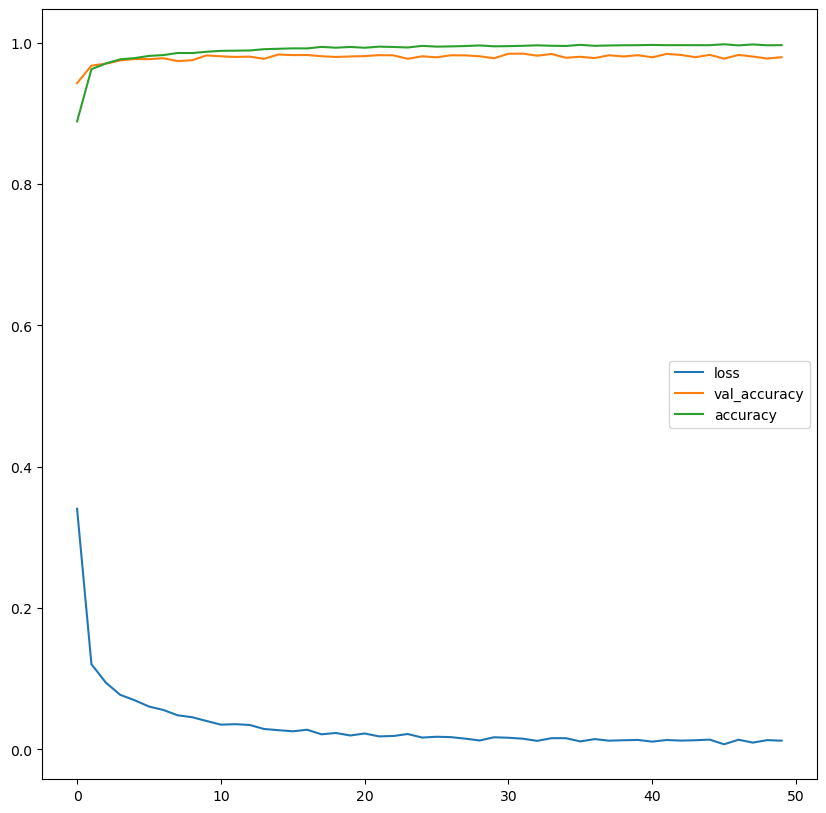

In [22]:
plt.figure(figsize=(10, 10))
plt.plot(h.history['loss'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['accuracy'])
plt.legend(['loss', 'val_accuracy', 'accuracy'])
plt.show()

In [23]:
submission = pd.DataFrame(
    {
        'ImageId': range(1, len(y_pred) + 1),
        'Label': y_pred
    }
)
submission.to_csv('submission.csv', index=False)